<a href="https://colab.research.google.com/github/nevesgil/ml_puc_back_model/blob/main/notebooks/ml_puc_mvp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPACESHIP TITANIC**

# **PUC-RIO MVP ENGENHARIA DE SOFTWARE**

GILMAR NEVES



---



Spaceship Titanic is a learning dataset from Kaggle, inspired by the famous Titanic problem and designed to help machine learning enthusiasts develop their first projects.

It features a synthetic dataset of passengers, complete with various attributes, and can be used to predict whether or not these passengers were transported to another dimension following the spaceship collision with a space-time anomaly.


# **EDA, TESTS, INITIAL MODELLING**

**INITIAL SETTINGS AND IMPORTS**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
import pathlib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

How does the dataset look like?

In [2]:
filepath = "https://raw.githubusercontent.com/nevesgil/ml_puc_back_model/main/data/train.csv"
df = pd.read_csv(filepath)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,4334_01,Europa,True,A/53/S,TRAPPIST-1e,47.0,False,0.0,0.0,0.0,0.0,0.0,Shamak Trupistic,True
1,2596_02,Mars,True,F/534/P,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Carde Kniva,True
2,5170_01,Earth,False,F/1056/P,55 Cancri e,23.0,False,0.0,306.0,392.0,9.0,13.0,Jeandy Hurchez,False
3,3579_01,Earth,False,F/675/S,PSO J318.5-22,20.0,False,0.0,0.0,1.0,0.0,2260.0,Joycey Cartez,False
4,1308_04,Europa,True,E/94/S,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,Medib Plegred,True


### EDA

What are the columns we have and their types?

In [3]:
print("Categorical Variables")
categorical_variables = df.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(col)

Categorical Variables
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [4]:
print("Numerical Variables")
numerical_variables = df._get_numeric_data().columns
for col in numerical_variables:
    print(col)

Numerical Variables
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [5]:
df.dtypes

,0
PassengerId,object
HomePlanet,object
CryoSleep,object
Cabin,object
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64


What is the distribution of nulls? Can they be removed?

In [6]:
def get_nulls(df):
    dict_nulls = {}
    for col in  df.columns:
        dict_nulls[col]=df[col].isnull().sum()

    df_nulls = pd.DataFrame(data=list(dict_nulls.values()),
                            index=list(dict_nulls.keys()),
                            columns=['#nulls'])
    return df_nulls

get_nulls(df)

,#nulls
PassengerId,0
HomePlanet,131
CryoSleep,144
Cabin,131
Destination,117
Age,121
VIP,147
RoomService,104
FoodCourt,111
ShoppingMall,139


In [7]:
def get_nulls_percentage(df):
    dict_nulls = {}
    for col in  df.columns:
        percentage_null_values = str(round(df[col].isnull().sum()/len(df),2))+\
        "%"
        dict_nulls[col] = percentage_null_values

    df_nulls = pd.DataFrame(data=list(dict_nulls.values()),
                            index=list(dict_nulls.keys()),
                            columns=['% nulls'])
    return df_nulls

get_nulls_percentage(df)

,% nulls
PassengerId,0.0%
HomePlanet,0.02%
CryoSleep,0.03%
Cabin,0.02%
Destination,0.02%
Age,0.02%
VIP,0.03%
RoomService,0.02%
FoodCourt,0.02%
ShoppingMall,0.02%


As there is not significant amount of nulls, let's remove them without negatively affecting the dataset.

In [8]:
for cat_col in categorical_variables:
    if cat_col!="Name":
        df[cat_col] = df[cat_col].fillna(df[cat_col].mode()[0])

In [9]:
for num_col in numerical_variables:
    df[num_col] = df[num_col].fillna(df[num_col].mean())

In [10]:
get_nulls_percentage(df)

,% nulls
PassengerId,0.0%
HomePlanet,0.0%
CryoSleep,0.0%
Cabin,0.0%
Destination,0.0%
Age,0.0%
VIP,0.0%
RoomService,0.0%
FoodCourt,0.0%
ShoppingMall,0.0%


A look into the numerical data.

In [11]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000,5693.000000
mean,28.843144,228.456432,470.125761,174.119553,318.024390,310.345007
std,14.337299,680.380338,1610.043291,626.472693,1130.745088,1164.834187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,82.000000,140.000000,46.000000,91.000000,85.000000
max,79.000000,14327.000000,27723.000000,23492.000000,18572.000000,24133.000000


Let's have a look at the categorical data.

In [12]:
df.describe(include=['O'])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,5693,5693,5693,5693,5563
unique,5693,3,4592,3,5559
top,4334_01,Earth,G/109/P,TRAPPIST-1e,Sharie Gallenry
freq,1,3143,138,3984,2


In [13]:
# Dropping the name column as we don't it need anymore
df.drop(['Name'], axis=1, inplace=True)

In [14]:
categorical_variables = df.select_dtypes(include=['object']).columns

In [15]:
categorical_variables

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination'], dtype='object')

By plotting the count of each categorical variable, we can see the distribution and evaluate it.

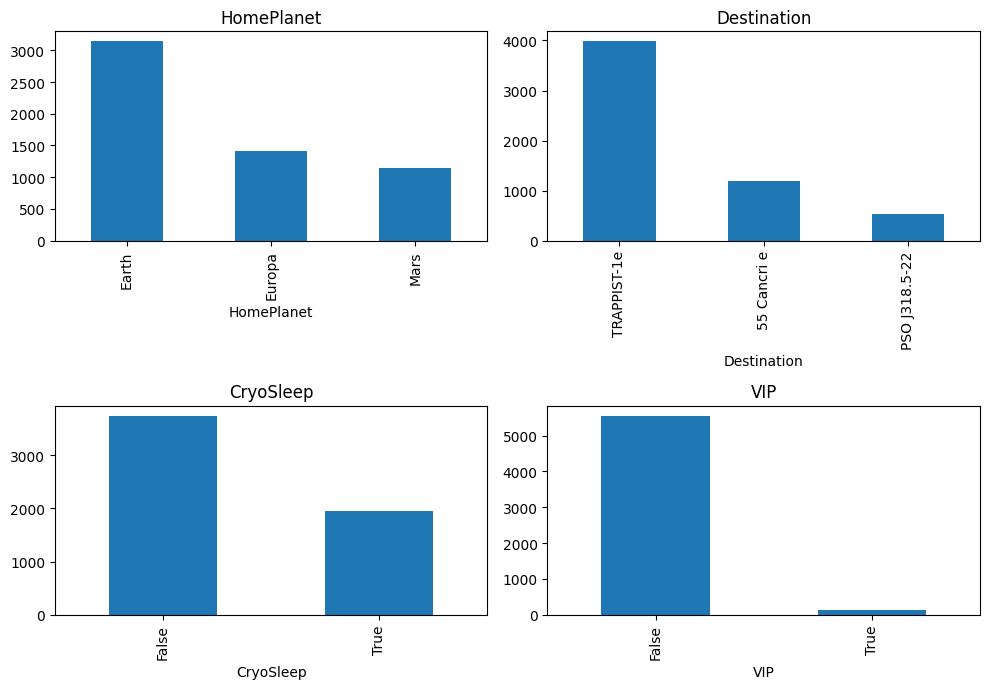

In [16]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
df['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2,2,2)
df['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
df['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
df['VIP'].value_counts().plot(kind='bar',title='VIP')
plt.tight_layout();

The charts show imbalances in the dataset. Most passengers are from Earth, with TRAPPIST-1e being the most common destination. Most travelers are not in CryoSleep, and very few are VIPs.

These distributions are uneven and could bias a predictive model. To address this, the dataset could be balanced using techniques like oversampling minority classes or stratifying during model training to improve prediction accuracy. However, for the sake of initial simplicity, let's not consider applying these techniques.

Now, the numeric data.

In [17]:
numerical_variables = list(numerical_variables)
if "train" in filepath:
    numerical_variables.remove('Transported')

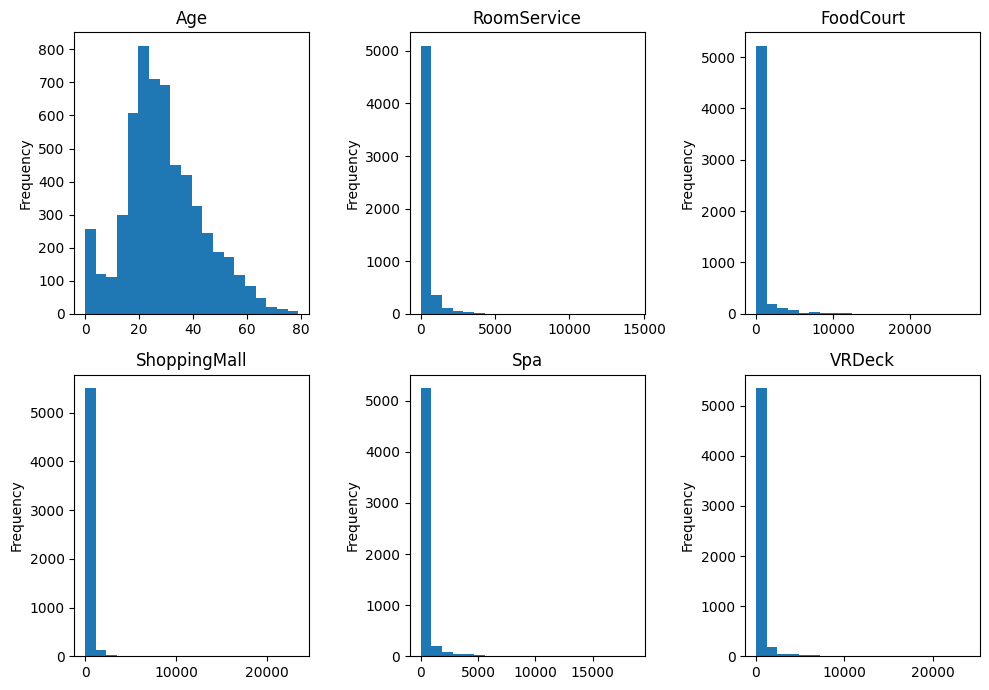

In [18]:
plt.figure(figsize=(10,7))
for i,num_col in enumerate(numerical_variables):
    plt.subplot(2,3,i+1)
    df[num_col].plot(kind='hist', bins=20)
    plt.title(num_col)
plt.tight_layout();

The charts from the Spaceship Titanic dataset reveal several insights. The Age distribution shows a skewed pattern, with most passengers between 18 and 40 years old, and a noticeable peak around 20, it indicates a younger demographic.

The features RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck are all heavily right-skewed, with most values clustered around 0, suggesting that many passengers did not utilize these services or spent minimally. A small number of passengers, however, spent significantly more, resulting in long tails in the distributions.

To handle this skewness, we could consider using scale transformations for the expense-related features, and address any potential missing data. Normalizing the data may improve the performance of machine learning models.

We may also consider adding up all the expenses variables as they behave similarly, and may indicate a general pattern of spending accross passangers.

Lets try some feature engineering for the CABIN as it can be splitted into at least 3 new columns.
  
  
  
*according to the Kaggle documentation:

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [19]:
# building the deck and port features from the 'cabin' column
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df['Port'] = df['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df["Deck"] = df["Deck"].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
df["Port"] = df["Port"].map({'P':0, 'S':1}).astype(int)
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,4334_01,Europa,True,TRAPPIST-1e,47.0,False,0.0,0.0,0.0,0.0,0.0,True,2,1
1,2596_02,Mars,True,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,True,1,0
2,5170_01,Earth,False,55 Cancri e,23.0,False,0.0,306.0,392.0,9.0,13.0,False,1,0
3,3579_01,Earth,False,PSO J318.5-22,20.0,False,0.0,0.0,1.0,0.0,2260.0,False,1,1
4,1308_04,Europa,True,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,True,4,1


In [20]:
###

Let's set a mapping for Home Planet and Destination so each can have an ID as a numerical value. Thus, any model can work with it as some models do not accept categorical data.

Also, as some columns are closely related to one another (spent value), we may also fit all of them into a single one. This save us space and do not affect negatively the training.

In [21]:
df["HomePlanet"] = df["HomePlanet"].map({'Earth':1, 'Europa':2, 'Mars':3}).astype(int)

df["Destination"] = df["Destination"].map({'TRAPPIST-1e':1, 'PSO J318.5-22':2, '55 Cancri e':3}).astype(int)

In [22]:
# Summing up the spending categories
df['TotalSpend'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
df = df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

In [23]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Port,TotalSpend
0,4334_01,2,True,1,47.0,False,True,2,1,0.0
1,2596_02,3,True,1,20.0,False,True,1,0,0.0
2,5170_01,1,False,3,23.0,False,False,1,0,720.0
3,3579_01,1,False,2,20.0,False,False,1,1,2261.0
4,1308_04,2,True,3,26.0,False,True,4,1,0.0


And boolean columns we may set as integers (0 and 1) for making it easier to work with as well.

In [24]:
# Convert all boolean columns to 0 and 1
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)

PassengerID, just like the passenger Name, can be removed too.

In [25]:
if 'train' in filepath:
    df.drop(['PassengerId'],axis=1, inplace=True)

Now that we have a cleaner and compact dataset, let's evaluate the correlation we get from the remaining variables.

In [26]:
# Check on the correlation

In [27]:
correlation_matrix = df.corr()
correlation_matrix

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Port,TotalSpend
HomePlanet,1.000000,0.079938,-0.029342,0.146558,0.128561,0.115201,0.020116,0.010096,0.154076
CryoSleep,0.079938,1.000000,0.102336,-0.064876,-0.082717,0.459847,0.032820,0.030074,-0.372099
Destination,-0.029342,0.102336,1.000000,0.005492,0.038202,0.106344,0.042316,0.011972,0.102459
Age,0.146558,-0.064876,0.005492,1.000000,0.096501,-0.054642,0.043117,0.015839,0.187789
VIP,0.128561,-0.082717,0.038202,0.096501,1.000000,-0.043377,0.032684,-0.005589,0.165269
Transported,0.115201,0.459847,0.106344,-0.054642,-0.043377,1.000000,0.008888,0.115698,-0.191178
Deck,0.020116,0.032820,0.042316,0.043117,0.032684,0.008888,1.000000,0.000235,0.143160
Port,0.010096,0.030074,0.011972,0.015839,-0.005589,0.115698,0.000235,1.000000,0.004555
TotalSpend,0.154076,-0.372099,0.102459,0.187789,0.165269,-0.191178,0.143160,0.004555,1.000000


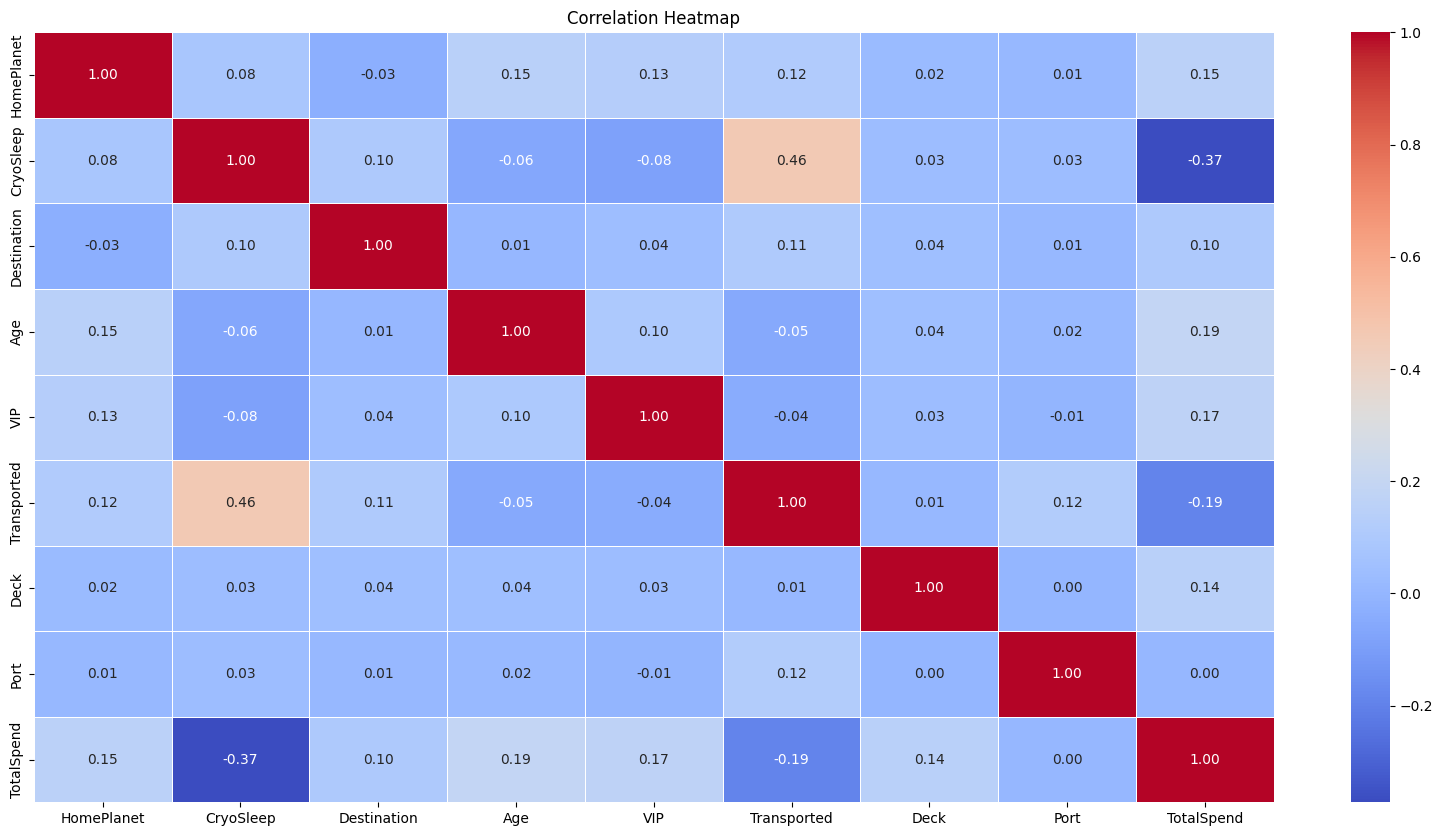

In [28]:
# correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix for the Spaceship Titanic dataset reveals a few relationships between features worthy of being noted. CryoSleep has a strong positive correlation (0.459) with Transported, suggesting that passengers in cryosleep were more likely to be transported. TotalSpend has a moderately positive correlation with Age (0.188), VIP (0.165), and HomePlanet (0.154), indicating that older passengers, VIPs, and those from certain planets tended to spend more. On the other hand, TotalSpend shows a significant negative correlation with CryoSleep (-0.372), suggesting that passengers in cryosleep spent less, which makes total sense. VIP has a mild correlation with Age (0.097), implying that older passengers were slightly more likely to be VIPs, a common behavior anywhere.

Given these relationships, focusing on features like CryoSleep, Age, and VIP when analyzing passenger behaviors could improve model performance. Also, further exploration of the relationship between spending and transportation outcomes might uncover deeper insights.

### FIRST TRAINING

For checking purposes only

Just for organizing the analysis, let's save the current dataframe and perform the first training.

In [29]:
### SAVE TRAIN 1

filename =  pathlib.Path(filepath).stem + "_cleaned_1.csv"
file_dest_path = pathlib.Path("./") / filename
df.to_csv(file_dest_path, index=False)

FIRST TRAINING JUST FOR CHECKING PURPOSES

In [30]:
df_train_1 = pd.read_csv("./train_cleaned_1.csv")
# 1 Train Test Split
X = df_train_1.drop("Transported", axis=1).values
y = df_train_1["Transported"].values

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((4554, 8), (4554,), (1139, 8), (1139,))

In [32]:
df_train_1.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Port,TotalSpend
0,2,1,1,47.0,0,True,2,1,0.0
1,3,1,1,20.0,0,True,1,0,0.0
2,1,0,3,23.0,0,False,1,0,720.0
3,1,0,2,20.0,0,False,1,1,2261.0
4,2,1,3,26.0,0,True,4,1,0.0


The chosen models are: KNN, DECISION TREE, NAIVE BAYES AND SVC

In [33]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_score)

KNN Accuracy: 0.7120280948200176


In [34]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_score = accuracy_score(y_test, dtree_pred)
print("Decision Tree Accuracy:", dtree_score)


Decision Tree Accuracy: 0.6733977172958736


In [35]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_score = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_score)


Naive Bayes Accuracy: 0.6979806848112379


In [36]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_score = accuracy_score(y_test, svc_pred)
print("SVM Accuracy:", svc_score)


SVM Accuracy: 0.723441615452151


In [37]:
results = pd.DataFrame(dict(model=['KNN',
                              'Decision Tree',
                              'Naive Bayes',
                              'SVM'],accuracy=[knn_score, dtree_score,
                                               nb_score, svc_score]))

results

,model,accuracy
0,KNN,0.712028
1,Decision Tree,0.673398
2,Naive Bayes,0.697981
3,SVM,0.723442


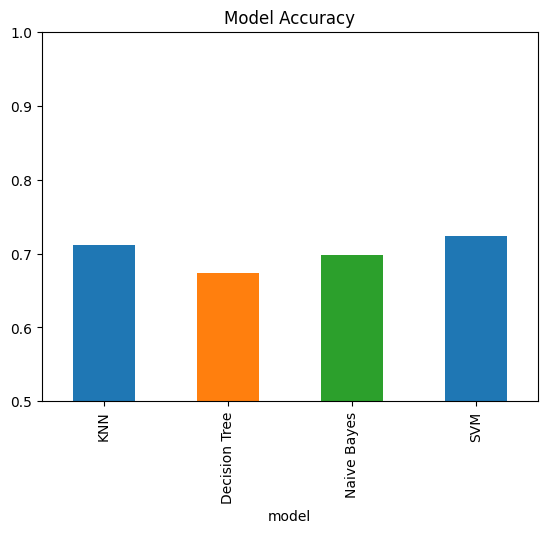

In [38]:
results.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.ylim(0.5,1);

The initial training results for the Spaceship Titanic dataset show varied but not so different performance across models. The SVM model has the highest accuracy at 0.723, making it the top-performing model in this set. KNN follows closely with 0.712, indicating solid performance as well. Naive Bayes performs decently with 0.698, but trails behind the others. The Decision Tree has the lowest accuracy at 0.679.

To improve results, consider tuning hyperparameters for SVM and KNN, and possibly use techniques like cross-validation or feature scaling.

### SECOND TRAINING

Applying some transformations, and dropping those columns with smaller correlations


In [39]:
df = df.drop(['Deck', 'Port'], axis=1)

In [40]:
# For Standardization (Z-score normalization)
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['TotalSpend'] = scaler.fit_transform(df[['TotalSpend']])

In [41]:
df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,TotalSpend
0,2,1,1,1.266518,0,True,-0.527405
1,3,1,1,-0.616847,0,True,-0.527405
2,1,0,3,-0.407584,0,False,-0.274431
3,1,0,2,-0.616847,0,False,0.267003
4,2,1,3,-0.198321,0,True,-0.527405


The scaled dataframe from the Spaceship Titanic dataset shows several features normalized around zero. HomePlanet, CryoSleep, and Destination are represented as categorical integers, while Age and TotalSpend are scaled continuous variables. For instance, in the first row, a passenger from HomePlanet 2 who was in CryoSleep (1) spent less than average (TotalSpend -0.527) but was Transported. VIP status appears mostly as 0 (non-VIP). The scaling allows for easier comparisons across features and will likely improve the performance of machine learning models by mitigating the impact of varying feature magnitudes previously observed in the original dataset.

In [42]:
correlation_matrix = df.corr()
correlation_matrix

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,TotalSpend
HomePlanet,1.000000,0.079938,-0.029342,0.146558,0.128561,0.115201,0.154076
CryoSleep,0.079938,1.000000,0.102336,-0.064876,-0.082717,0.459847,-0.372099
Destination,-0.029342,0.102336,1.000000,0.005492,0.038202,0.106344,0.102459
Age,0.146558,-0.064876,0.005492,1.000000,0.096501,-0.054642,0.187789
VIP,0.128561,-0.082717,0.038202,0.096501,1.000000,-0.043377,0.165269
Transported,0.115201,0.459847,0.106344,-0.054642,-0.043377,1.000000,-0.191178
TotalSpend,0.154076,-0.372099,0.102459,0.187789,0.165269,-0.191178,1.000000


The correlation matrix after normalization reveals several key relationships. CryoSleep continues to have a strong positive correlation with Transported (0.460), indicating that passengers in cryosleep were more likely to be transported. TotalSpend has a positive correlation with Age (0.188) and VIP (0.165), suggesting that older passengers and VIPs tend to spend more. On the other hand, CryoSleep has a strong negative correlation with TotalSpend (-0.372), implying that passengers in cryosleep spent significantly less.
These initial observations remains the same as compared to the previous correlation results, indicating the consistency of the data. HomePlanet and VIP also show modest correlations with TotalSpend, which could be further explored for potential insights. The normalized features are now better suited for machine learning algorithms, with correlations more consistent across the board.

Just for organizing the analysis, let's save the current dataframe and perform the second training.

In [43]:
### SAVE TRAIN 2

filename =  pathlib.Path(filepath).stem + "_cleaned_2.csv"
file_dest_path = pathlib.Path("./") / filename
df.to_csv(file_dest_path, index=False)

In [44]:
df_train_2 = pd.read_csv("./train_cleaned_2.csv")
# 1. Train Test Split
X = df_train_2.drop("Transported", axis=1).values
y = df_train_2["Transported"].values

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((4554, 6), (4554,), (1139, 6), (1139,))

The same splitting size and models are to be used here.

In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_score)

KNN Accuracy: 0.6900790166812993


In [47]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_score = accuracy_score(y_test, dtree_pred)
print("Decision Tree Accuracy:", dtree_score)

Decision Tree Accuracy: 0.6540825285338016


In [48]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_score = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_score)

Naive Bayes Accuracy: 0.694468832309043


In [49]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_score = accuracy_score(y_test, svc_pred)
print("SVM Accuracy:", svc_score)

SVM Accuracy: 0.7295873573309921


In [50]:
results = pd.DataFrame(dict(model=['KNN',
                              'Decision Tree',
                              'Naive Bayes',
                              'SVM'],accuracy=[knn_score, dtree_score,
                                               nb_score, svc_score]))

results

,model,accuracy
0,KNN,0.690079
1,Decision Tree,0.654083
2,Naive Bayes,0.694469
3,SVM,0.729587


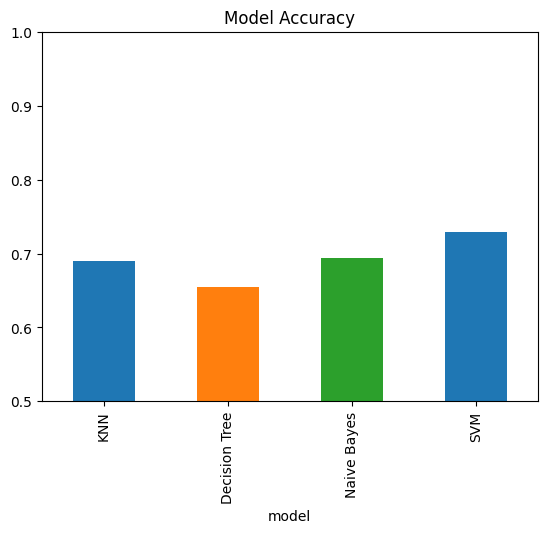

In [51]:
results.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.ylim(0.5,1);

After normalizing the data, the updated model results show improved performance, particularly for the SVM model, which now achieves the highest accuracy at 0.730. Naive Bayes performs fairly well at 0.694, slightly improving over the earlier result. KNN has slightly decreased in accuracy to 0.690, which might suggest that normalization did not benefit this model as much. The Decision Tree still has the lowest accuracy at 0.657, indicating possible overfitting or inefficiency with this dataset.

Moving forward, further tuning of hyperparameters for SVM could enhance performance, while for KNN, different distance metrics might improve results.

the pieces of code below are saved for future revisiting and review

# **FINAL VERSION**

### INITIAL SETTINGS, FUNCTIONS AND IMPORTS

In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pickle

In [53]:
class DataReader():
    def __init__(self, filepath):
        self.filepath = filepath

    def read_csv(self):
        df = pd.read_csv(self.filepath)
        return df

In [54]:
class NullRemover:
    def __init__(self, df):
        """
        Initializes the NullRemover class with a DataFrame.

        Parameters:
        df (pd.DataFrame): The input DataFrame that may contain null values.
        """
        self.df = df
        self.categorical_variables = self.df.select_dtypes(include=['object']).columns
        self.numerical_variables = self.df._get_numeric_data().columns

    def remove_nulls(self):
        """
        Removes null values from both categorical and numerical columns.

        Categorical columns are filled with the mode (most frequent value),
        and numerical columns are filled with the mean.
        """
        # Handle categorical variables
        for cat_col in self.categorical_variables:
            if cat_col != "Name":
                self.df[cat_col] = self.df[cat_col].fillna(self.df[cat_col].mode()[0])

        # Handle numerical variables
        for num_col in self.numerical_variables:
            self.df[num_col] = self.df[num_col].fillna(self.df[num_col].mean())

        return self.df

    def get_nulls_percentage(self):
        """
        Returns the percentage of null values in each column of the DataFrame.

        Returns:
        pd.DataFrame: A DataFrame containing the percentage of null values in each column.
        """
        dict_nulls = {}
        for col in self.df.columns:
            percentage_null_values = str(round(self.df[col].isnull().sum() / len(self.df), 2)) + "%"
            dict_nulls[col] = percentage_null_values

        df_nulls = pd.DataFrame(data=list(dict_nulls.values()),
                                index=list(dict_nulls.keys()),
                                columns=['% nulls'])
        return df_nulls




In [55]:
class DataTransformer:
    def __init__(self, df):
        """
        Initializes the DataTransformer class with a DataFrame.

        Parameters:
        df (pd.DataFrame): The input DataFrame for data transformation.
        """
        self.df = df

    def sum_spending_columns(self):
        """
        Sums up the spending categories (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)
        and creates a new 'TotalSpend' column. The original spending columns are dropped.

        Returns:
        pd.DataFrame: The transformed DataFrame with 'TotalSpend' and without individual spending columns.
        """
        # Summing up the spending categories
        self.df['TotalSpend'] = self.df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
        # Dropping the individual spending columns
        self.df = self.df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)
        return self.df

    def map_categorical_columns(self):
        """
        Maps categorical values in 'HomePlanet' and 'Destination' columns to integers.

        HomePlanet: {'Earth':1, 'Europa':2, 'Mars':3}
        Destination: {'TRAPPIST-1e':1, 'PSO J318.5-22':2, '55 Cancri e':3}

        # TODO: map this dynamically in a database

        Returns:
        pd.DataFrame: The transformed DataFrame with mapped values for 'HomePlanet' and 'Destination'.
        """
        # Mapping values for HomePlanet and Destination
        self.df["HomePlanet"] = self.df["HomePlanet"].map({'Earth': 1, 'Europa': 2, 'Mars': 3}).astype(int)
        self.df["Destination"] = self.df["Destination"].map({'TRAPPIST-1e': 1, 'PSO J318.5-22': 2, '55 Cancri e': 3}).astype(int)
        return self.df

    def drop_columns(self):
        """
        Drops the 'Name', 'Cabin', and 'PassengerID' columns from the DataFrame.

        Returns:
        pd.DataFrame: The transformed DataFrame without the specified columns.
        """
        self.df = self.df.drop(['Name', 'Cabin', 'PassengerId'], axis=1)
        return self.df

    def convert_bool_columns(self):
        """
        Converts the 'CryoSleep' and 'VIP' columns to boolean type.

        Returns:
        pd.DataFrame: The transformed DataFrame with 'CryoSleep' and 'VIP' as boolean.
        """
        self.df['CryoSleep'] = self.df['CryoSleep'].astype(int)
        self.df['VIP'] = self.df['VIP'].astype(int)
        return self.df


In [56]:

class BaseEvaluator:
    def __init__(self, X_train, y_train, kfold, scoring):
        """
        Initialize the BaseEvaluator with training data, cross-validation method, and scoring function.

        :param X_train: Training features
        :param y_train: Training labels
        :param kfold: Cross-validation splitting strategy
        :param scoring: Scoring method to evaluate the models
        """
        self.X_train = X_train
        self.y_train = y_train
        self.kfold = kfold
        self.scoring = scoring
        self.models = []
        self.results = []
        self.names = []

    def create_models(self):
        """
        Create a list of machine learning models to be evaluated.
        """
        self.models.append(('KNN', KNeighborsClassifier()))
        self.models.append(('CART', DecisionTreeClassifier()))
        self.models.append(('NB', GaussianNB()))
        self.models.append(('SVM', SVC()))

    def evaluate_models(self):
        """
        Evaluate each model using cross-validation and store the results.
        """
        for name, model in self.models:
            cv_results = cross_val_score(model, self.X_train, self.y_train, cv=self.kfold, scoring=self.scoring)
            self.results.append(cv_results)
            self.names.append(name)
            print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

    def plot_results(self):
        """
        Plot the comparison of models using a boxplot.
        """
        fig = plt.figure(figsize=(12, 6))
        fig.suptitle('Model Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(self.results)
        ax.set_xticklabels(self.names)
        plt.show()


In [57]:
class ScaleEvaluator:
    def __init__(self, X_train, y_train, kfold, scoring):
        """
        Initialize the ScaleEvaluator with training data, cross-validation method, and scoring function.

        :param X_train: Training features
        :param y_train: Training labels
        :param kfold: Cross-validation splitting strategy
        :param scoring: Scoring method to evaluate the models
        """
        self.X_train = X_train
        self.y_train = y_train
        self.kfold = kfold
        self.scoring = scoring
        self.pipelines = []
        self.results = []
        self.names = []

    def create_pipelines(self):
        """
        Create pipelines for various models with original data, standardized data, and normalized data.

        TODO: allow for more models and data transformations without repeating code and hardcoding the chosen models
        """
        # Define the models
        knn = ('KNN', KNeighborsClassifier())
        cart = ('CART', DecisionTreeClassifier())
        naive_bayes = ('NB', GaussianNB())
        svm = ('SVM', SVC())

        # Define the transformations
        standard_scaler = ('StandardScaler', StandardScaler())
        min_max_scaler = ('MinMaxScaler', MinMaxScaler())

        # Original dataset pipelines
        self.pipelines.append(('KNN-orig', Pipeline([knn])))
        self.pipelines.append(('CART-orig', Pipeline([cart])))
        self.pipelines.append(('NB-orig', Pipeline([naive_bayes])))
        self.pipelines.append(('SVM-orig', Pipeline([svm])))

        # Standardized dataset pipelines
        self.pipelines.append(('KNN-std', Pipeline([standard_scaler, knn])))
        self.pipelines.append(('CART-std', Pipeline([standard_scaler, cart])))
        self.pipelines.append(('NB-std', Pipeline([standard_scaler, naive_bayes])))
        self.pipelines.append(('SVM-std', Pipeline([standard_scaler, svm])))

        # Normalized dataset pipelines
        self.pipelines.append(('KNN-mm', Pipeline([min_max_scaler, knn])))
        self.pipelines.append(('CART-mm', Pipeline([min_max_scaler, cart])))
        self.pipelines.append(('NB-mm', Pipeline([min_max_scaler, naive_bayes])))
        self.pipelines.append(('SVM-mm', Pipeline([min_max_scaler, svm])))

    def evaluate_pipelines(self):
        """
        Evaluate each pipeline using cross-validation and store the results.
        """
        for name, model in self.pipelines:
            cv_results = cross_val_score(model, self.X_train, self.y_train, cv=self.kfold, scoring=self.scoring)
            self.results.append(cv_results)
            self.names.append(name)
            print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

    def plot_results(self):
        """
        Plot the comparison of pipelines using a boxplot.
        """
        fig = plt.figure(figsize=(25, 6))
        fig.suptitle('Model Comparison - Original, Standardized, and Normalized Data')
        ax = fig.add_subplot(111)
        plt.boxplot(self.results)
        ax.set_xticklabels(self.names, rotation=90)
        plt.show()



In [58]:
class StdTuning:
    def __init__(self, X_train, y_train, kfold=5, scoring='accuracy'):
        """
        Initialize the StdTuning with training data, cross-validation method, and scoring function.

        :param X_train: Training features
        :param y_train: Training labels
        :param kfold: Cross-validation splitting strategy (default=5)
        :param scoring: Scoring method to evaluate the models (default='accuracy')
        """
        self.X_train = X_train
        self.y_train = y_train
        self.kfold = kfold
        self.scoring = scoring
        self.pipelines = []
        self.param_grids = {}
        np.random.seed(7)  # Set a global seed for reproducibility

    def create_pipelines(self):
        """
        Create pipelines with standard scaling for KNN, CART, NB, and SVM models.
        """
        # Define the models
        models = [
            ('KNN', KNeighborsClassifier()),
            ('CART', DecisionTreeClassifier()),
            ('NB', GaussianNB()),
            ('SVM', SVC())
        ]

        # Define the standard scaler step
        standard_scaler = ('StandardScaler', StandardScaler())

        # Create pipelines for each model with standard scaling
        for name, model in models:
            self.pipelines.append((name + '-std', Pipeline(steps=[standard_scaler, (name, model)])))

    def define_param_grids(self):
        """
        Define the parameter grids for GridSearchCV tuning for each model.
        """
        self.param_grids = {
            'KNN': {
                'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                'KNN__metric': ["euclidean", "manhattan", "minkowski"],
                'KNN__weights': ["uniform", "distance"],
            },
            'CART': {
                'CART__max_depth': [None, 10, 20, 30, 40, 50],
                'CART__min_samples_split': [2, 5, 10],
                'CART__min_samples_leaf': [1, 2, 4],
                'CART__criterion': ["gini", "entropy"],
            },
            'NB': {
                'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
            },
            'SVM': {
                'SVM__C': [0.1, 1, 10],
                'SVM__gamma': ['scale', 'auto'],
                'SVM__kernel': ['rbf', 'linear', 'poly']
            }
        }

    def run_grid_search(self):
        """
        Run GridSearchCV for each pipeline and print the best configurations.
        """
        for name, pipeline in self.pipelines:
            model_type = name.split('-')[0]  # Extract model type (e.g., 'KNN', 'CART', etc.)
            if model_type in self.param_grids:
                param_grid = self.param_grids[model_type]
            else:
                param_grid = {}  # Default empty param grid if not defined

            # Run GridSearchCV
            grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=self.scoring, cv=self.kfold)
            grid.fit(self.X_train, self.y_train)

            # Print the best score and parameters
            print(f"Model: {name} - Best: {grid.best_score_:.3f} using {grid.best_params_}")



### SET DATAFRAME AND PARAMETERS

In [59]:
reader = DataReader("https://raw.githubusercontent.com/nevesgil/ml_puc_back_model/main/data/train.csv")
df = reader.read_csv()

null_remover = NullRemover(df)
df = null_remover.remove_nulls()


transformer = DataTransformer(df)

# Apply transformations
df = transformer.sum_spending_columns()
df = transformer.map_categorical_columns()
df = transformer.drop_columns()
df = transformer.convert_bool_columns()

In [60]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,TotalSpend
0,2,1,1,47.0,0,True,0.0
1,3,1,1,20.0,0,True,0.0
2,1,0,3,23.0,0,False,720.0
3,1,0,2,20.0,0,False,2261.0
4,2,1,3,26.0,0,True,0.0


In [61]:
# Setting the axis for training the models

X = df.drop("Transported", axis=1).values
y = df["Transported"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((4554, 6), (4554,), (1139, 6), (1139,))

In [62]:
seed = 42

# Parameters and partitions for cross validation
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)

### INITIAL EVALUATIONS

In [63]:
### BASE EVALUATION

In [64]:
evaluator = BaseEvaluator(X_train, y_train, kfold, scoring)
evaluator.create_models()
evaluator.evaluate_models()


KNN: 0.693 (0.015)
CART: 0.659 (0.020)
NB: 0.716 (0.020)
SVM: 0.728 (0.016)


In [65]:
### BASE AND SCALER EVALUATION

In [66]:
#

scale_evaluator = ScaleEvaluator(X_train, y_train, kfold, scoring)
scale_evaluator.create_pipelines()
scale_evaluator.evaluate_pipelines()


KNN-orig: 0.693 (0.015)
CART-orig: 0.658 (0.018)
NB-orig: 0.716 (0.020)
SVM-orig: 0.728 (0.016)
KNN-std: 0.690 (0.019)
CART-std: 0.657 (0.018)
NB-std: 0.716 (0.020)
SVM-std: 0.735 (0.018)
KNN-mm: 0.693 (0.013)
CART-mm: 0.657 (0.020)
NB-mm: 0.716 (0.020)
SVM-mm: 0.729 (0.017)


The performance analysis of the models shows that SVM (Support Vector Machine) consistently achieves the highest accuracy, reaching 0.735 with StandardScaler. This is the best score across all models and preprocessing methods. The original SVM accuracy stands at 0.728, while it slightly drops to 0.729 with MinMaxScaler. In contrast, Naive Bayes (NB) maintains a stable performance of 0.716 regardless of the preprocessing method. KNN (K-Nearest Neighbors) displays consistent scores of 0.693 for both the original and MinMax-scaled datasets and a minor decline to 0.690 with StandardScaler.

When examining the impact of preprocessing techniques, SVM clearly benefits from scaling, as indicated by its improved performance with StandardScaler. This suggests that SVM is sensitive to feature scaling and responds positively to preprocessing.

The variance analysis provides insight into the consistency of the models’ performances. SVM shows slightly higher variance with StandardScaler (0.018) compared to the original dataset (0.016), yet it continues to perform well overall.

In conclusion, to maximize accuracy, SVM with StandardScaler comes as the top candidate. Naive Bayes remains a strong, stable option across all preprocessing techniques, making it a reliable alternative. KNN provides consistent performance, particularly with MinMax scaling, while CART's lower scores across all methods indicate it may need further optimization. Exploring feature engineering or parameter tuning may enhance performance in future iterations of the analysis.

### TUNNING THE MODELS

In [67]:
#
std_tuning = StdTuning(X_train, y_train)
std_tuning.create_pipelines()  # Create the pipelines with standard scaling
std_tuning.define_param_grids()  # Define the parameter grids
std_tuning.run_grid_search()  # Run the grid search and print the best results


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Model: KNN-std - Best: 0.733 using {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21, 'KNN__weights': 'uniform'}
Model: CART-std - Best: 0.721 using {'CART__criterion': 'entropy', 'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
Model: NB-std - Best: 0.715 using {'NB__var_smoothing': 1e-09}
Model: SVM-std - Best: 0.739 using {'SVM__C': 10, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}


A impressive result was achieved after tuning your models. The Support Vector Machine (SVM) is the best performer with an accuracy of 0.739, using a regularization parameter C of 10 and an RBF kernel. The K-Nearest Neighbors (KNN) model also performed well, reaching an accuracy of 0.733 with 21 neighbors and uniform weights. The CART model yielded an accuracy of 0.721 with a maximum depth of 10 and using entropy as the criterion. Lastly, Naive Bayes (NB) provided stable performance with an accuracy of 0.715 by adjusting the var_smoothing parameter to 1e-09. Overall, SVM's ability to handle complex relationships and KNN's reliance on proximity contribute significantly to their strong performances.

Using SVM for final predictions due to its highest accuracy may be a safe choice. It’s also advisable to validate the results through cross-validation to ensure robustness. Additionally, exploring feature importance with the models can offer insights into which features most influence predictions, aiding in model interpretability.

In [68]:
###########

Let`s now evaluate the chosen model (SVM) in two different ways just so we can double check on the results we get from it.

#

 - Model: SVM-std - Best: 0.739 using {'SVM__C': 10, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}


In [69]:
# model and scaler
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=10, gamma='scale', kernel='rbf')
model.fit(rescaledX, y_train)

# estimate
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.7348551360842844


In [70]:
# using the whole pipeline at once

model = SVC(C=10, gamma='scale', kernel='rbf')

pipeline = Pipeline(steps=[('StandardScaler', StandardScaler()), ('SVC', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7348551360842844


### EVALUATE THE MODEL WITH TEST DATA THE MODEL HAS NOT YET SEEN BEFORE

In [71]:
# TEST DATA

In [72]:
reader = DataReader("https://raw.githubusercontent.com/nevesgil/ml_puc_back_model/main/data/test.csv")
df = reader.read_csv()

null_remover = NullRemover(df)
df = null_remover.remove_nulls()

transformer = DataTransformer(df)

# Apply transformations
df = transformer.sum_spending_columns()
df = transformer.map_categorical_columns()
df = transformer.drop_columns()
df = transformer.convert_bool_columns()

In [73]:
# Setting the axis for training the models

X = df.drop("Transported", axis=1).values
y = df["Transported"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((2400, 6), (2400,), (600, 6), (600,))

In [74]:

# Assuming X_train, y_train are the training data and X_test, y_test are the test data

# 1. Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# 2. Use the pipeline to predict on the new test set
y_pred = pipeline.predict(X_test)

# 3. Evaluate the performance
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.758
Confusion Matrix:
[[257  43]
 [102 198]]
Classification Report:
              precision    recall  f1-score   support

       False       0.72      0.86      0.78       300
        True       0.82      0.66      0.73       300

    accuracy                           0.76       600
   macro avg       0.77      0.76      0.76       600
weighted avg       0.77      0.76      0.76       600



The model's accuracy of 0.758 means it correctly predicts about 76% of the cases. It has high recall (0.86) for predicting passengers not transported, but lower precision (0.72) That means some incorrect False predictions.

For passengers transported, it has good precision (0.82) but lower recall (0.66), thus it may miss some actual True cases.

The model performs better at identifying passengers who were not transported, but may be problematic with identifying all transported passengers.

In [75]:
###

### SAVE THE MODEL AS A PICKLE FILE

Lastly, we may save the best performer model and export it for using in an app.

In [76]:
# Save the model
model_filename = 'spaceship_model.pkl'
with open("./"+model_filename, 'wb') as file:
    pickle.dump(model, file)

# Save the scaler
scaler_filename = 'spaceship_scaler.pkl'
with open("./"+scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Save the pipeline
pipeline_filename = 'spaceship_pipeline.pkl'
with open("./"+pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

# Save X_test and y_test
X_test_df = pd.DataFrame(X_test, columns=df.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[df.columns[-1]])
X_test_df.to_csv("./X_test_dataset_spaceship.csv", index=False)
y_test_df.to_csv("./y_test_dataset_spaceship.csv", index=False)

### FINAL CONTROL TEST WITH SOME MOCK DATA

In [77]:

# Load the pipeline
with open('./spaceship_pipeline.pkl', 'rb') as file:
    model = pickle.load(file)

# Example input data (dropping 'Transported' column)
input_data = {
    'HomePlanet': [1, 2, 1, 3, 2],
    'CryoSleep': [0, 1, 0, 0, 1],
    'Destination': [3, 2, 3, 1, 3],
    'Age': [67, 28, 23, 15, 26],
    'VIP': [0, 0, 1, 0, 1],
    'TotalSpend': [456.0, 0.0, 20.0, 1.0, 0.0]
}

# DataFrame
input_df = pd.DataFrame(input_data)

# Run the model to get predictions
predictions = model.predict(input_df)

# Show the predictions
print(predictions)


[ True  True  True False  True]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### CONCLUSION

In conclusion, this comprehensive analysis, comprising of exploratory data analysis (EDA), data transformation, and model evaluation, has provided valuable insights into the dataset and its underlying patterns.

Through meticulous preprocessing and feature engineering, we ensured that the models could effectively learn from the data.

The tuning process highlighted the strengths of various algorithms, with the Support Vector Machine (SVM) emerging as the top performer, achieving an accuracy of 0.739. This suggests that the model is well-suited for capturing complex relationships within the data. The successful application of K-Nearest Neighbors, CART, and Naive Bayes further validates the robustness of our approach.

Moving forward, these findings will not only inform decision-making but also guide future enhancements and refinements in our predictive modeling efforts.

### EXTRA: Test Kaggle data

This data comes with no answer for the Transported column. It is required to be submitted into Kaggle for evaluation of the results.

In [78]:
reader = DataReader("https://raw.githubusercontent.com/nevesgil/ml_puc_back_model/refs/heads/main/data/kaggle_test.csv")
dfk = reader.read_csv()

In [79]:
dfk.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [80]:
null_remover = NullRemover(dfk)
dfk = null_remover.remove_nulls()

transformer = DataTransformer(dfk)

# Apply transformations
dfk = transformer.sum_spending_columns()
dfk = transformer.map_categorical_columns()

dfk = transformer.convert_bool_columns()

dfk = dfk.drop(['Name', 'Cabin'], axis=1)

In [81]:
dfk.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,TotalSpend
0,0013_01,1,1,1,27.0,0,0.0
1,0018_01,1,0,1,19.0,0,2832.0
2,0019_01,2,1,3,31.0,0,0.0
3,0021_01,2,0,1,38.0,0,7418.0
4,0023_01,1,0,1,20.0,0,645.0


In [82]:
X_test = dfk.drop(columns=['PassengerId'])

predictions = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': dfk['PassengerId'],
    'Transported': predictions
})

submission.to_csv('submission.csv', index=False)

submission.head()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


After submitting the results on Kaggle, the final result is quite similar to the accuracy I get from the model.

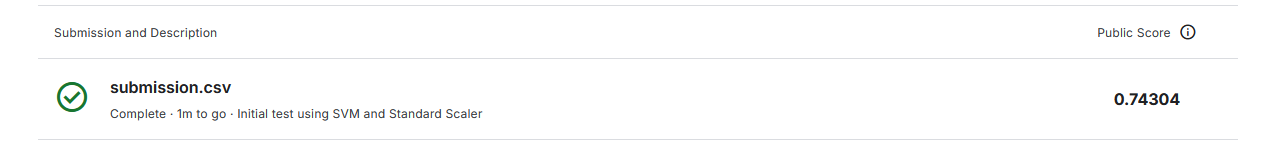

In [83]:
#